In [95]:
import os
import numpy as np
import pandas as pd
import os.path as op
import sklearn.cluster as clu

import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
def compute_canonical_from_dataframe(input_data, seed=11, k=2):
    """
    Processes the input pandas DataFrame by centering and scaling (unit variance)
    without applying a log transformation, and then runs k-means clustering.
    
    Parameters:
      data: pandas DataFrame
            The input data.
      seed: int
            Random seed for reproducibility.
      k: int
            Number of clusters for k-means clustering.
    
    Returns:
      labels_results: numpy array with clustering labels.
    """    
    # Convert DataFrame to NumPy array.
    data = input_data.values

    # Centering the data.
    print("Centering data...")
    means = np.nanmean(data, axis=1)
    means = np.atleast_2d(means).T
    data = data - means
    print("Row means (used for centering)")

    # Scaling data to unit variance.
    print("Scaling data to unit variance...")
    stds = np.nanstd(data, axis=1, ddof=1)
    stds = np.atleast_2d(stds).T
    data = data / stds
    print("Row standard deviations")
    
    # Replace any non-finite numbers.
    data = np.nan_to_num(data, nan=0, posinf=0, neginf=0)   
    print("Covariance matrix of processed data")
    
    # Perform k-means clustering.
    kmeans = clu.KMeans(n_clusters=k, n_init=1, random_state=seed).fit(data)
    labels_results = kmeans.labels_
    return data, labels_results
    

# Data

In [97]:
metadata = pd.read_csv("after/design_all.tsv", sep="\t")
metadata.head(5)

,sample_id,Status,batch,Fed_K2_before_6,Fed_K2_after_6,Fed_K2_before_11,Fed_K2_after_11,Fed_K2_before_20,Fed_K2_after_20,Fed_K2_before_42,Fed_K2_after_42,Fed_K2_before_150,Fed_K2_after_150
0,GSM139435,1,4,1,1,0,0,0,0,0,0,1,1
1,GSM139436,1,4,1,1,0,0,0,0,0,0,1,1
2,GSM139437,1,4,1,1,0,0,0,0,0,0,1,1
3,GSM139438,1,4,1,1,0,0,0,0,0,0,1,1
4,GSM139439,1,4,1,1,0,0,0,0,0,0,1,1


In [98]:
# Read the TSV file
expr_before = pd.read_csv("before/all_expr_for_correction.tsv", 
                          delimiter="\t",
                          header=0)

# Set 'gene_id' column as the index (similar to column_to_rownames in R)
expr_before = expr_before.set_index("gene_id")
expr_before = expr_before.loc[:,metadata['sample_id']]


In [99]:
for seed_value in [6, 11, 20, 42, 150]:
    # Run the computation with the converted R dataframe.
    scaled_data, labels_results = compute_canonical_from_dataframe(expr_before.T, seed=seed_value, k=2)
    # Convert the labels to a pandas DataFrame.
    labels_df = pd.DataFrame(labels_results, columns=['cluster_label'])

    metadata['Centr_2K_before_'+str(seed_value)] = labels_df['cluster_label']

Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data
Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data
Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data
Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data
Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data


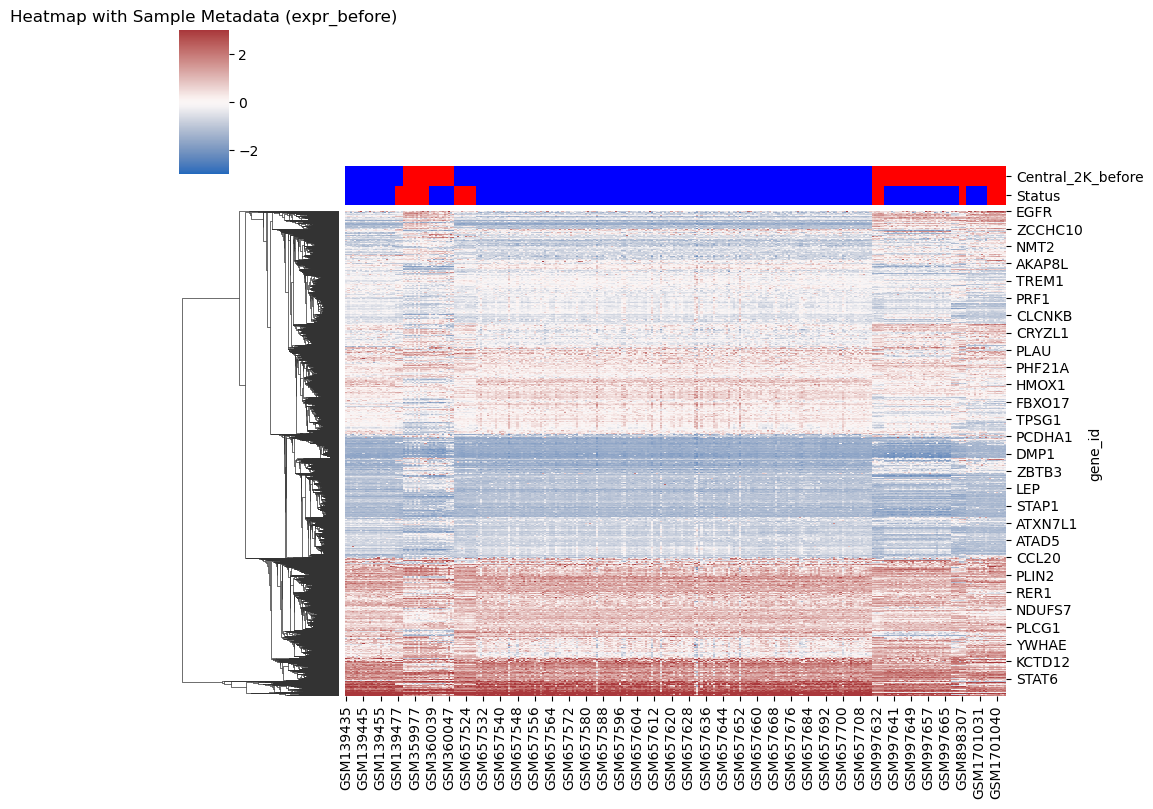

In [ ]:
# scaled_data = pd.DataFrame(scaled_data, columns=expr_before.index, index=expr_before.columns)
# class_to_color = {
#     0: 'red',
#     1: 'blue'
# }
# # Generate a Series of colors based on the class labels in the metadata
# row_colors = pd.DataFrame({
#     'Central_2K_before': metadata['Central_2K_before'].map(class_to_color),
#     'Status': metadata['Status'].map(class_to_color)
# })
# row_colors.index = metadata['sample_id']

# sns.clustermap(scaled_data.T, col_colors=row_colors, figsize=(10, 8), 
#                cmap='vlag', vmin=-3, vmax=3,
#                row_cluster=True, col_cluster=False)
# plt.title('Heatmap with Sample Metadata (expr_before)')
# plt.show()

In [100]:
# Read the TSV file
expr_after = pd.read_csv("after/all_corrected_R_expr.tsv", 
                          delimiter="\t",
                          header=0)

# Set 'gene_id' column as the index (similar to column_to_rownames in R)
expr_after = expr_after.set_index("gene_id")
expr_after = expr_after.loc[:,metadata['sample_id']]


In [101]:
for seed_value in [6, 11, 20, 42, 150]:
    # Run the computation with the converted R dataframe.
    scaled_data, labels_results = compute_canonical_from_dataframe(expr_after.T, seed=seed_value, k=2)
    # Convert the labels to a pandas DataFrame.
    labels_df = pd.DataFrame(labels_results, columns=['cluster_label'])

    metadata['Centr_2K_after_'+str(seed_value)] = labels_df['cluster_label']
    # replace 0 with 1 and 1 with 0
    # metadata['Central_2K_after'] = metadata['Central_2K_after'].replace({0: 1, 1: 0})

Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data
Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data
Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data
Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data
Centering data...
Row means (used for centering)
Scaling data to unit variance...
Row standard deviations
Covariance matrix of processed data


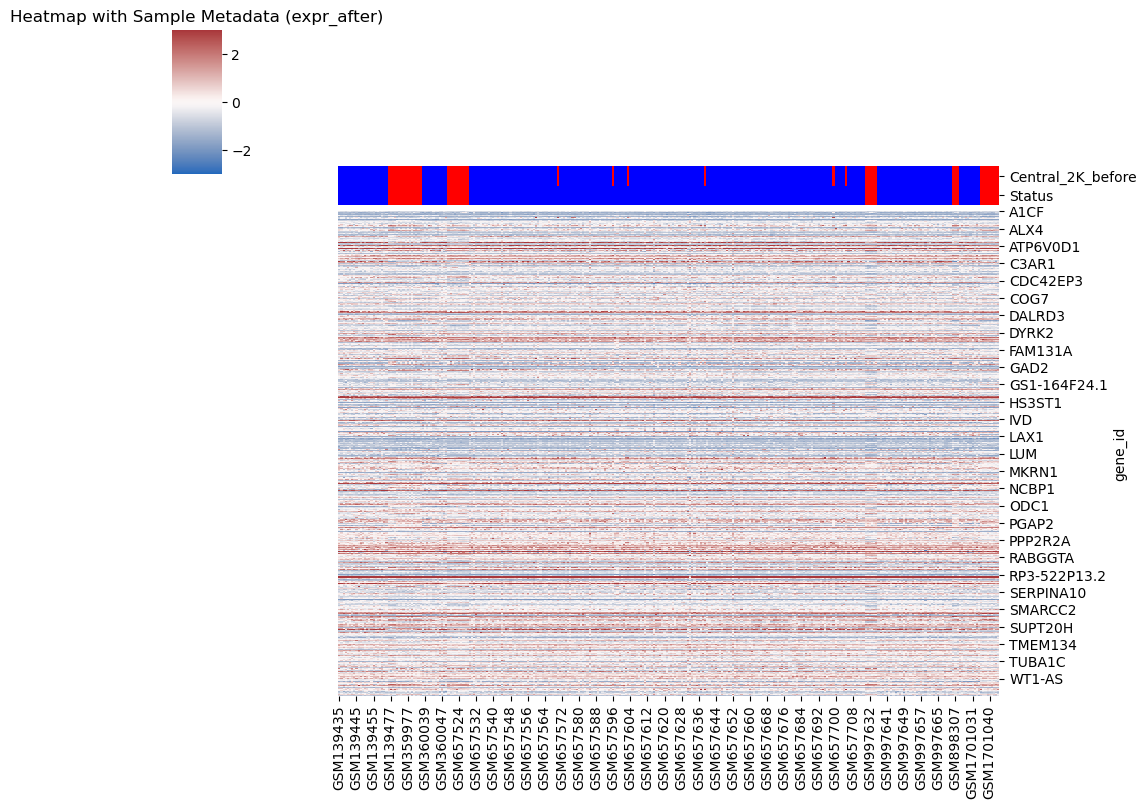

In [ ]:
# scaled_data = pd.DataFrame(scaled_data, columns=expr_before.index, index=expr_before.columns)
# class_to_color = {
#     0: 'red',
#     1: 'blue'
# }
# # Generate a Series of colors based on the class labels in the metadata
# row_colors = pd.DataFrame({
#     'Central_2K_before': metadata['Central_2K_after'].map(class_to_color),
#     'Status': metadata['Status'].map(class_to_color)
# })
# row_colors.index = metadata['sample_id']

# sns.clustermap(scaled_data.T, col_colors=row_colors, figsize=(10, 8), 
#                cmap='vlag', vmin=-3, vmax=3,
#                row_cluster=False, col_cluster=False)
# plt.title('Heatmap with Sample Metadata (expr_after)')
# plt.show()

In [102]:
# write metadata to file
metadata.to_csv("after/design_all_updated.tsv", sep="\t", index=False)